## Code

In [ ]:
import streamlit as st
import PyPDF2
import io
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# creating simple UI using Streamlit
st.set_page_config(page_title="AI Resume Critiquer", layout="centered")
st.title("AI Resume Critiquer")
st.markdown("Upload your resume and get AI-powered feedback tailored to your needs!")
uploaded_file = st.file_uploader("Upload your resume (pdf or txt)", type=["pdf", "txt"])
job_role = st.text_input("Enter the job role you are targeting (optional)")
analyze = st.button("Analyze Resume")

# LLM can't work on pdf files but they can work on text, so we are defining 2 methods for extracting text based on uploaded file type
def extract_text_from_file(uploaded_file):
    if uploaded_file.type == "application/pdf":                            # if uploaded file is pdf
        return extract_text_from_pdf(io.BytesIO(uploaded_file.read()))
    return uploaded_file.read().decode("utf-8")                         # if uploaded file is txt

# extracting text from pdf files
def extract_text_from_pdf(pdf_file):
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text() + "\n"
    return text

if analyze and uploaded_file:       # if 'analyze' button is pressed AND file is uploaded
    try:
        file_content = extract_text_from_file(uploaded_file)    # geting extracted text

        if not file_content.strip():                            # if uploaded file is empty -> show error
            st.error("Uploaded file does not have any content")
            st.stop()

        # user prompt for LLM
        prompt = f"""Please analyze this resume and provide constructive feedback.
        Focus on the following aspects:
        1. Content clarity and impact
        2. Skills presentation
        3. Experience descriptions
        4. Specific improvements for {job_role if job_role else 'general job applications'}

        Resume content:
        {file_content}

        Please provide your analysis in a clear, structured format with specific recommendations."""

        client = OpenAI(api_key=OPENAI_API_KEY)

        # capturing the response of LLM
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role":"system", "content":"You are an expert resume reviewer with years of experience in HR and recruitment."},     # system message to LLM
                {"role":"user", "content": prompt}
            ],
            temperature=0.7,
            max_tokens=1000
        )

        # showing the result
        st.markdown("### Analysis Results")
        st.markdown(response.choices[0].message.content)

    except Exception as e:
        st.error(f"An error occured: {str(e)}")

## Simple UI using Streamlit

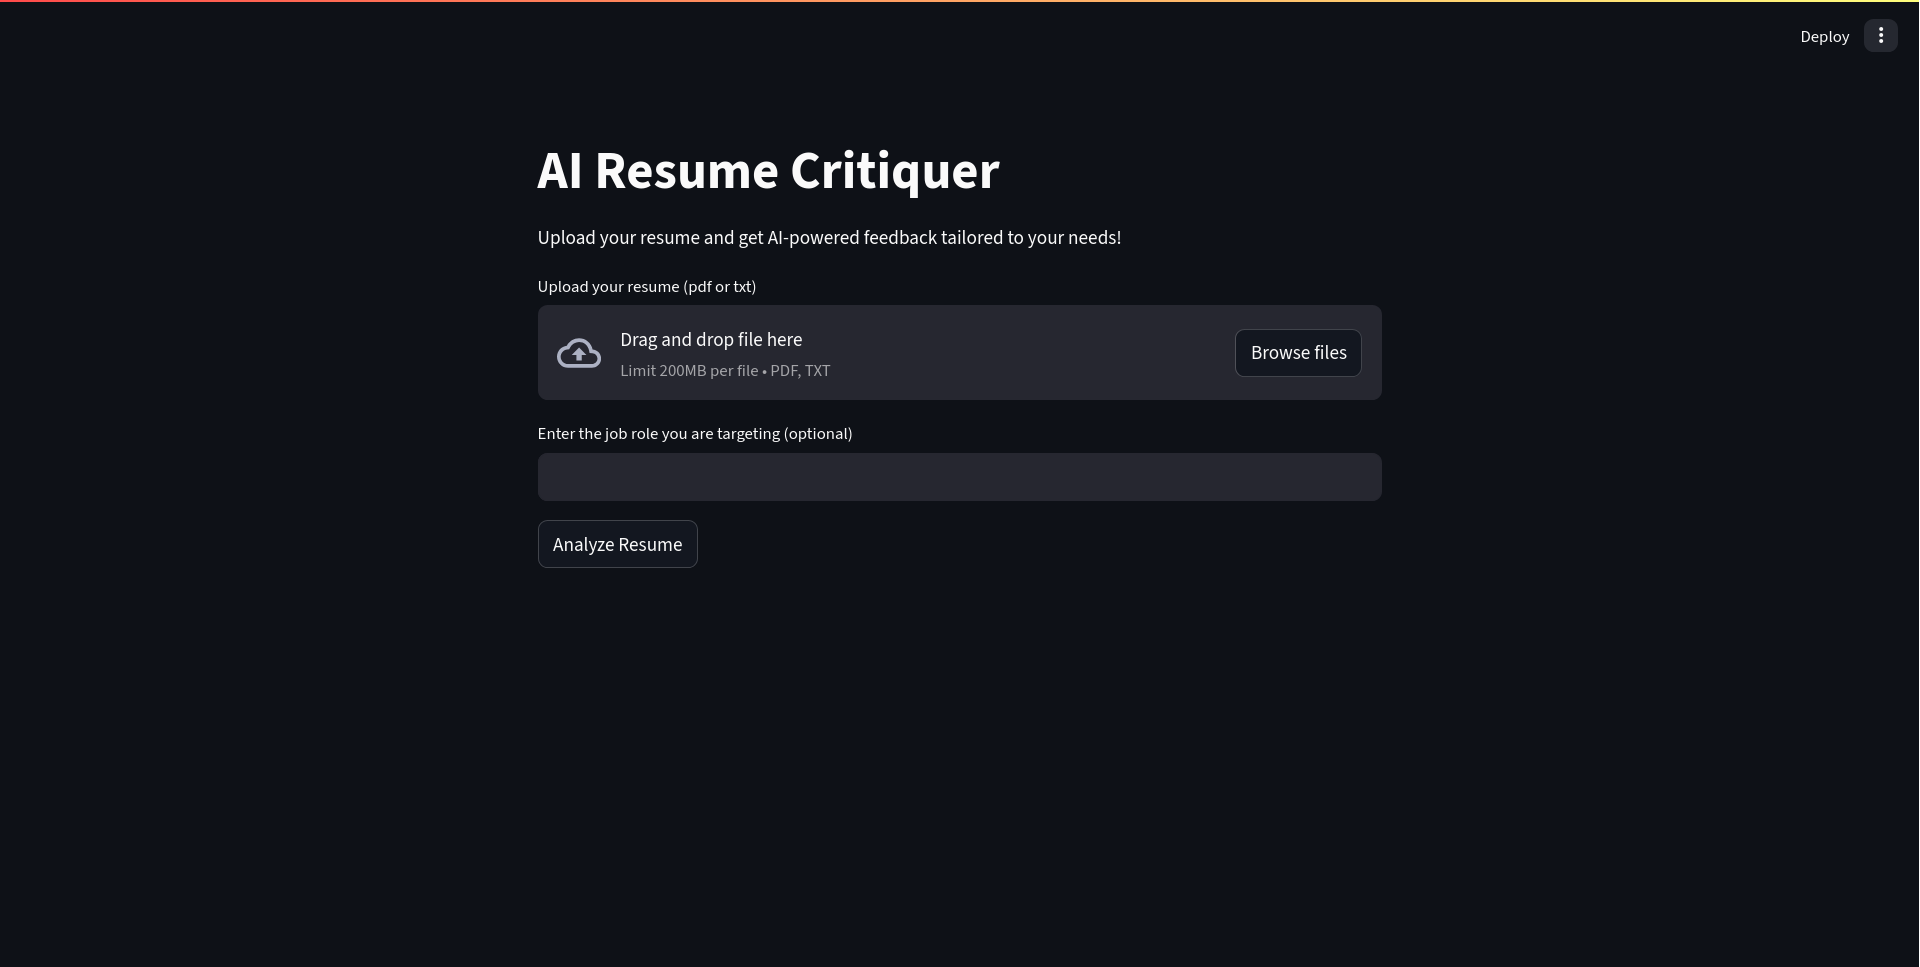

## Input

**Sample Resume.pdf:**

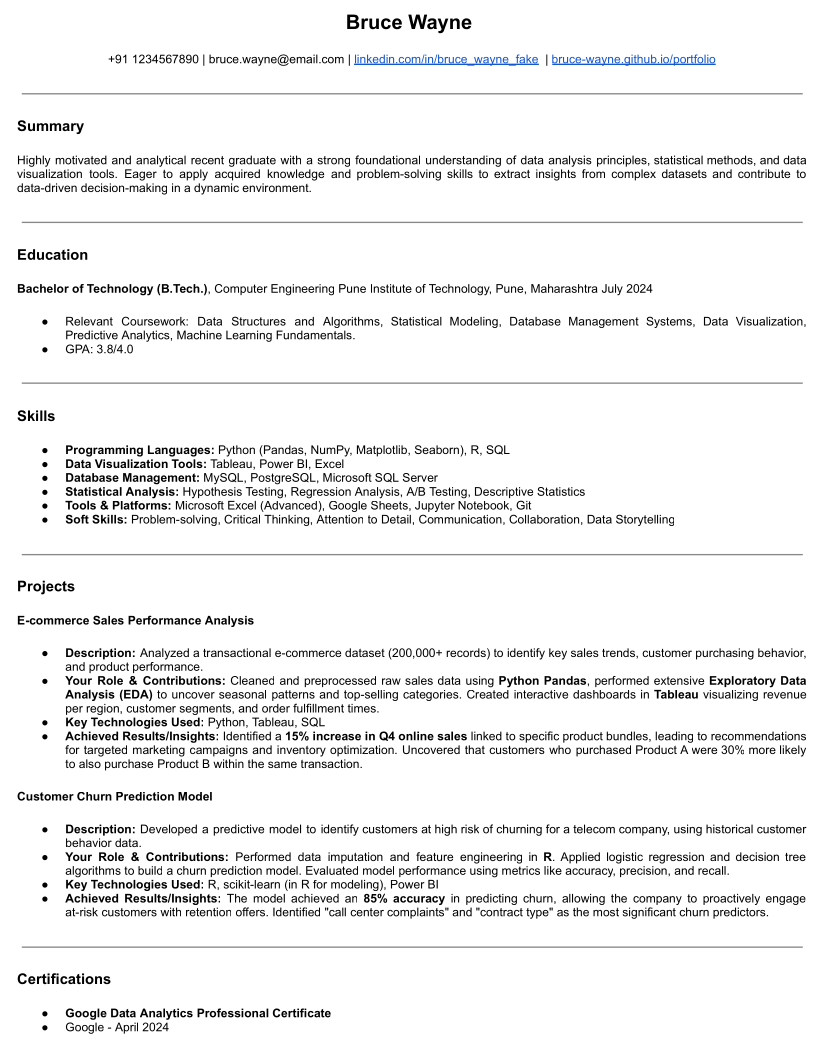

## Output

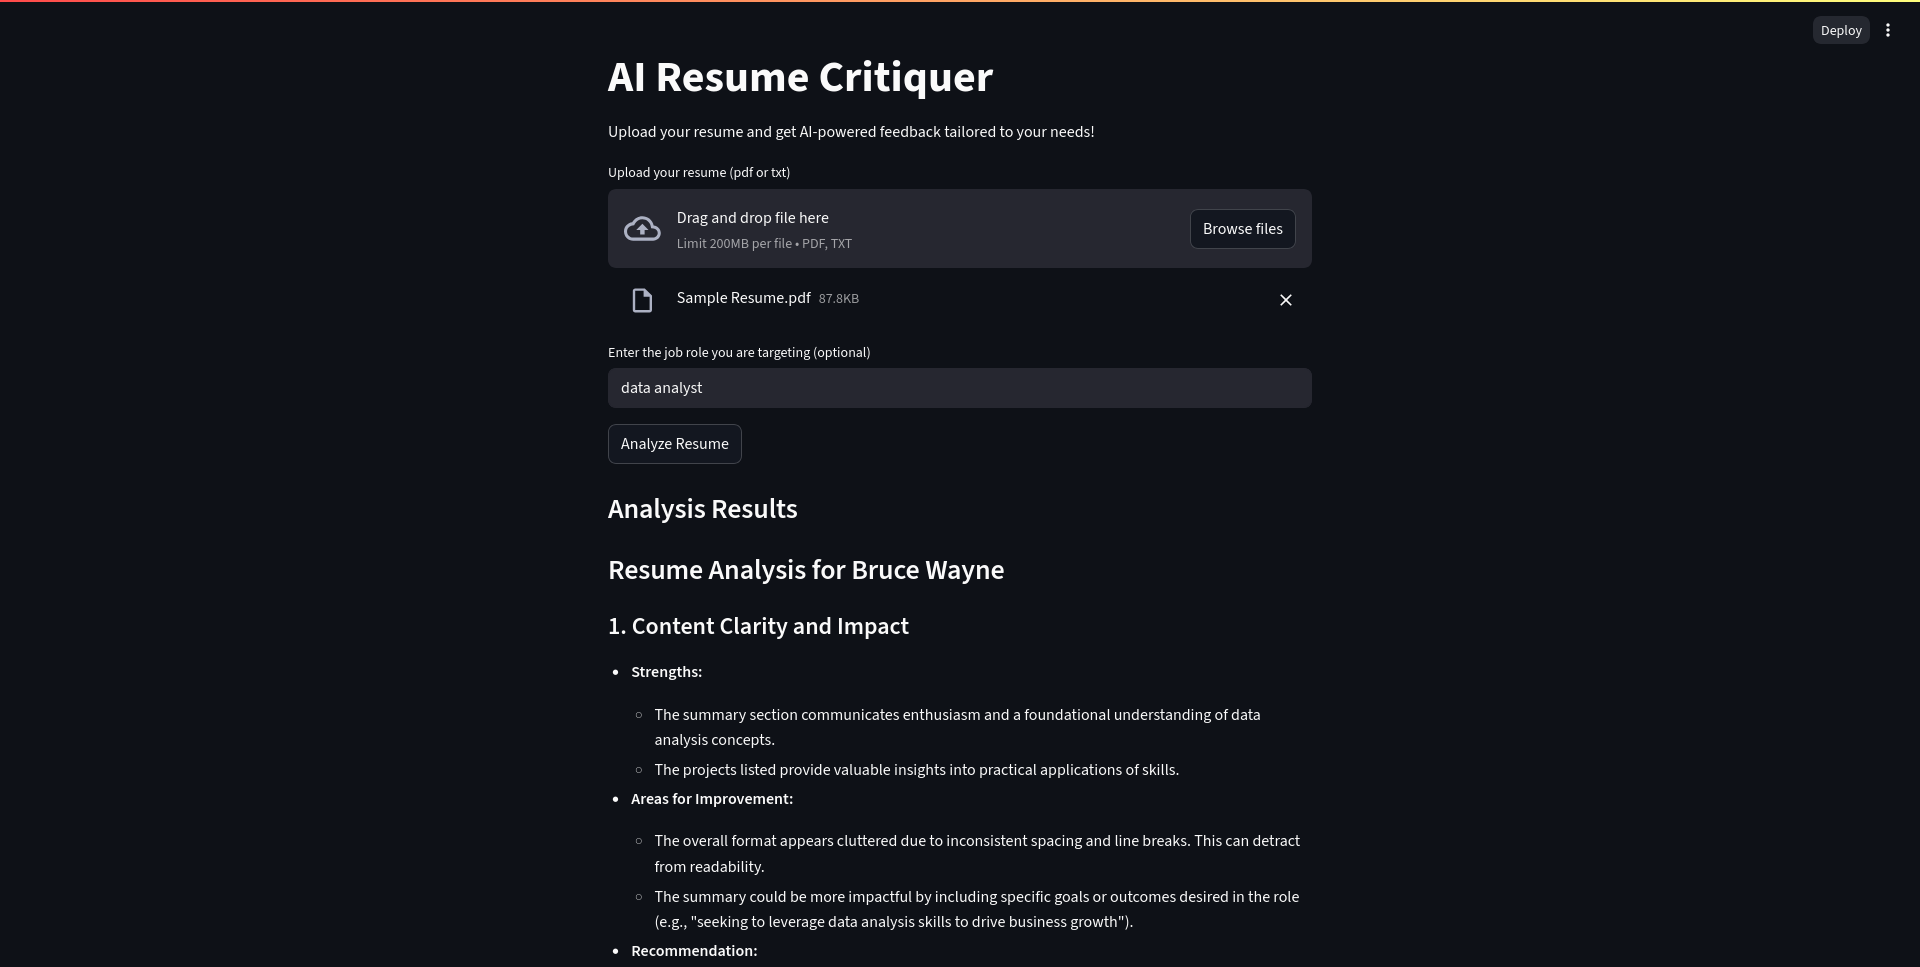

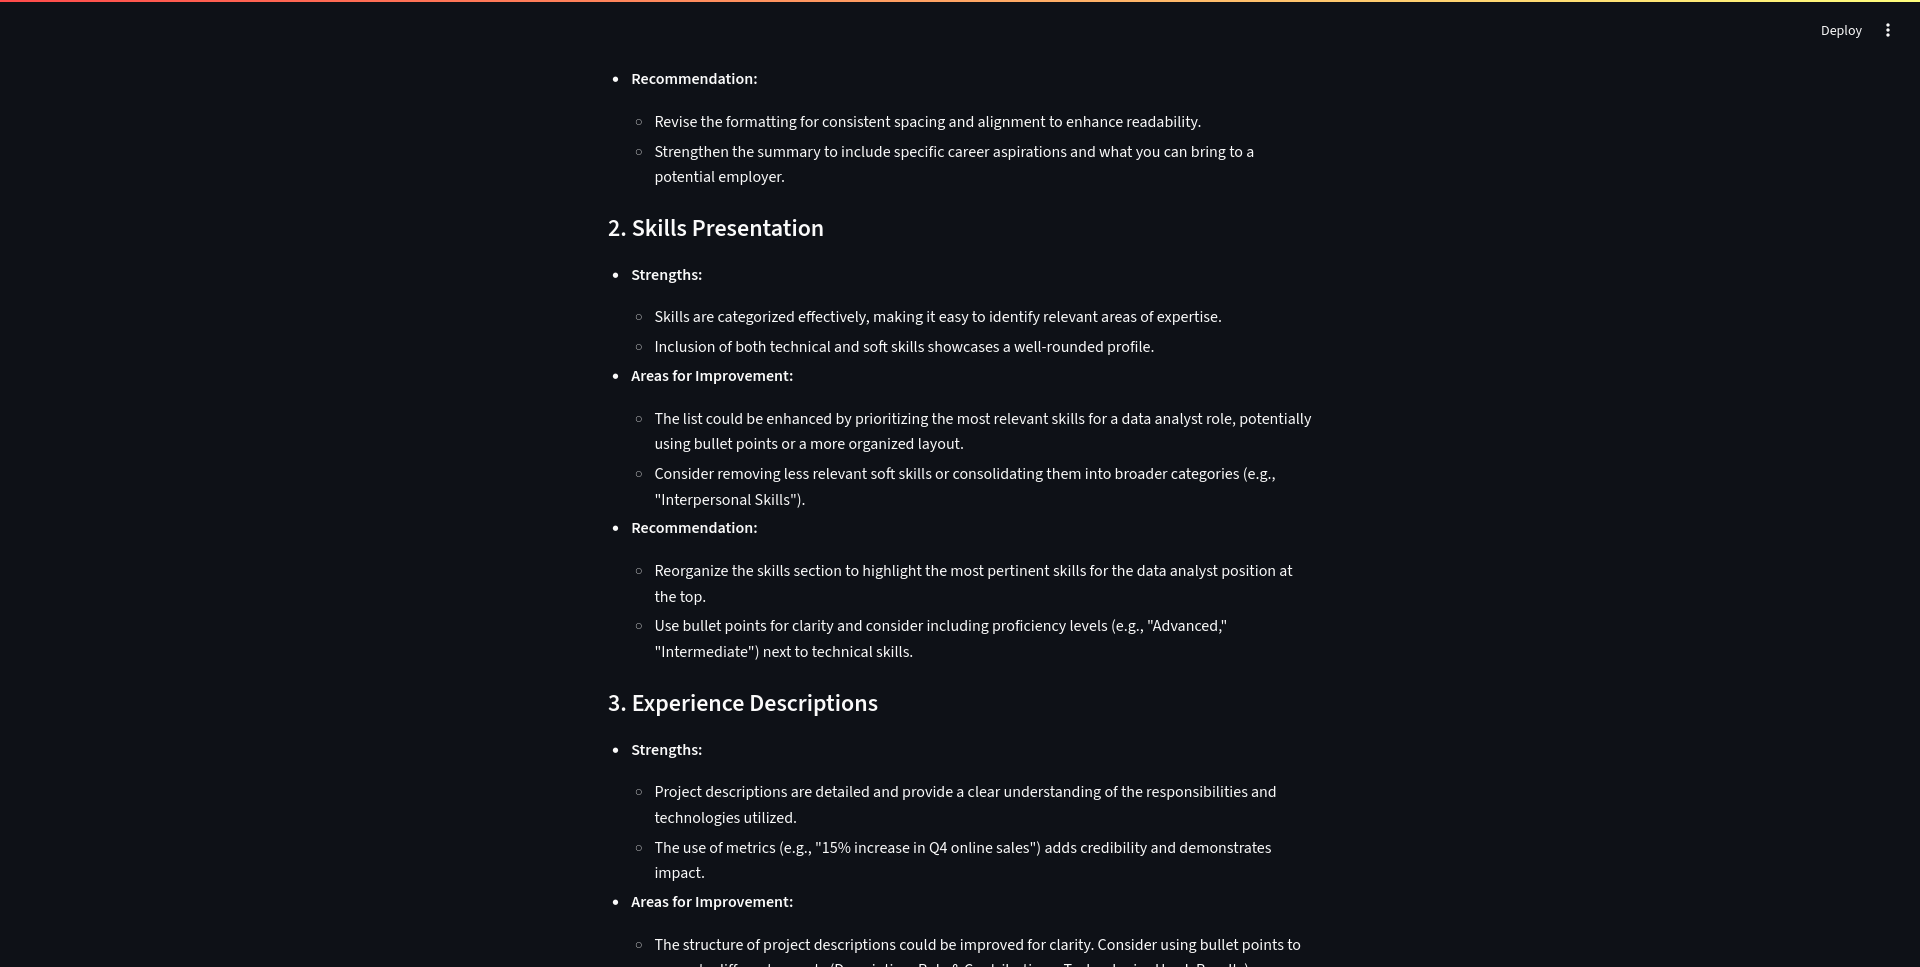

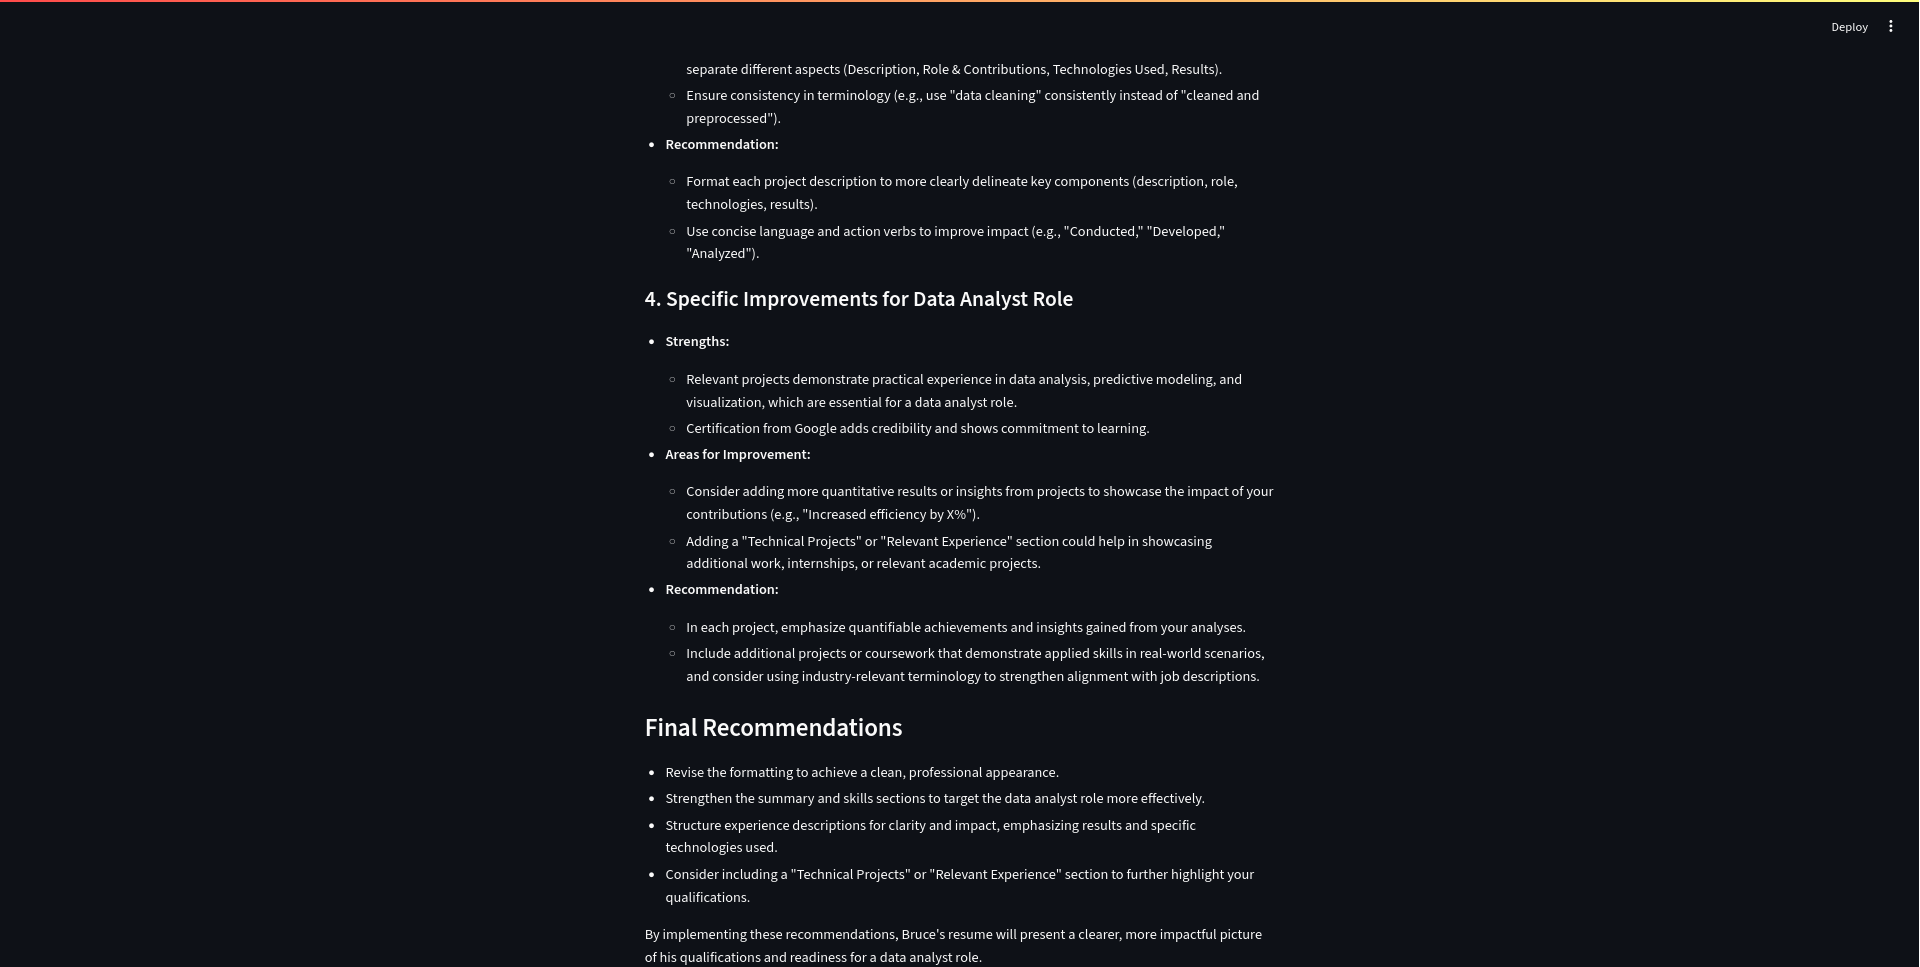

***Text Output:-***

Analysis Results

Resume Analysis for Bruce Wayne
1. Content Clarity and Impact

    Strengths:
        The summary section communicates enthusiasm and a foundational understanding of data analysis concepts.
        The projects listed provide valuable insights into practical applications of skills.

    Areas for Improvement:
        The overall format appears cluttered due to inconsistent spacing and line breaks. This can detract from readability.
        The summary could be more impactful by including specific goals or outcomes desired in the role (e.g., "seeking to leverage data analysis skills to drive business growth").

    Recommendation:
        Revise the formatting for consistent spacing and alignment to enhance readability.
        Strengthen the summary to include specific career aspirations and what you can bring to a potential employer.

2. Skills Presentation

    Strengths:
        Skills are categorized effectively, making it easy to identify relevant areas of expertise.
        Inclusion of both technical and soft skills showcases a well-rounded profile.

    Areas for Improvement:
        The list could be enhanced by prioritizing the most relevant skills for a data analyst role, potentially using bullet points or a more organized layout.
        Consider removing less relevant soft skills or consolidating them into broader categories (e.g., "Interpersonal Skills").

    Recommendation:
        Reorganize the skills section to highlight the most pertinent skills for the data analyst position at the top.
        Use bullet points for clarity and consider including proficiency levels (e.g., "Advanced," "Intermediate") next to technical skills.

3. Experience Descriptions

    Strengths:
        Project descriptions are detailed and provide a clear understanding of the responsibilities and technologies utilized.
        The use of metrics (e.g., "15% increase in Q4 online sales") adds credibility and demonstrates impact.

    Areas for Improvement:
        The structure of project descriptions could be improved for clarity. Consider using bullet points to separate different aspects (Description, Role & Contributions, Technologies Used, Results).
        Ensure consistency in terminology (e.g., use "data cleaning" consistently instead of "cleaned and preprocessed").

    Recommendation:
        Format each project description to more clearly delineate key components (description, role, technologies, results).
        Use concise language and action verbs to improve impact (e.g., "Conducted," "Developed," "Analyzed").

4. Specific Improvements for Data Analyst Role

    Strengths:
        Relevant projects demonstrate practical experience in data analysis, predictive modeling, and visualization, which are essential for a data analyst role.
        Certification from Google adds credibility and shows commitment to learning.

    Areas for Improvement:
        Consider adding more quantitative results or insights from projects to showcase the impact of your contributions (e.g., "Increased efficiency by X%").
        Adding a "Technical Projects" or "Relevant Experience" section could help in showcasing additional work, internships, or relevant academic projects.

    Recommendation:
        In each project, emphasize quantifiable achievements and insights gained from your analyses.
        Include additional projects or coursework that demonstrate applied skills in real-world scenarios, and consider using industry-relevant terminology to strengthen alignment with job descriptions.

Final Recommendations

    Revise the formatting to achieve a clean, professional appearance.
    Strengthen the summary and skills sections to target the data analyst role more effectively.
    Structure experience descriptions for clarity and impact, emphasizing results and specific technologies used.
    Consider including a "Technical Projects" or "Relevant Experience" section to further highlight your qualifications.

By implementing these recommendations, Bruce's resume will present a clearer, more impactful picture of his qualifications and readiness for a data analyst role.